### **Introduction**

<div style="text-align: justify;">  Sebagai seorang Data Scientist, Anda diminta untuk menganalisis data <i>Supermarket Customers</i> menggunakan Jupyter Notebook dengan tools seperti Visual Studio Code dan Tableau. Hasil analisis diharapkan dapat memberikan wawasan strategis yang membantu Supermarket meningkatkan performa secara optimal. Fokus analisis kiranya dapat meliputi identifikasi pola pelanggan, optimalisasi strategi pemasaran, serta peningkatan efisiensi operasional, sehingga mendukung pengambilan keputusan berbasis data secara lebih efektif.
</div>

### **Problem Statement**

Dalam rangka mendapatkan wawasan yang lebih mendalam dan relevan, langkah pertama yang perlu dilakukan adalah memahami secara jelas permasalahan yang dihadapi oleh _Supermarket_. Dengan mengenali kebutuhan analisis yang ada, kita dapat merumuskan pendekatan yang tepat untuk memperoleh solusi yang dapat meningkatkan performa dan efisiensi secara keseluruhan. Berikut adalah analisis yang akan dilakukan:

**1. Demografi Customer**
- Menganalisis distribusi pelanggan berdasarkan:
  - Usia
  - Tingkat pendidikan
  - Pendapatan
  - Jumlah anggota keluarga
  - Status perkawinan
- Mengidentifikasi hubungan antara pendapatan dengan variabel lainnya.

**2. Analisis Pola Pembelian**
- Mengevaluasi total pembelian dan rata-rata pembelian di setiap kategori produk.
- Mengidentifikasi kanal pembelian yang paling sering digunakan oleh pelanggan.
- Mengidentifikasi hubungan antara pendapatan dengan total pembelian customer.

**3. Analisis Perilaku Customer**
- Melakukan segmentasi pelanggan menggunakan pendekatan **RFM Analysis** untuk memahami pola keterlibatan mereka.

**4. Evaluasi Kampanye Pemasaran**
- Melihat trend penerimaan customer terhadap campaign yang dilakukan oleh Supermarket.
- Distribusi dan Segmentasi Customer Berdasarkan Respon Campaign.

**5. Cohort Analysis**
- Menganalisis tren peningkatan dan penurunan jumlah customer dari tahun 2012 - 2014

**6. Evaluasi Engagement Website**
- Persentase Pengguna Berdasarkan Frekuensi
- Segmentasi Customer berdasarkan Jumlah Kunjungan Website


### **Data Understanding**

In [60]:
#import library
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 10000)

In [61]:
#open dataset dengan pandas menggunakan delimeter
data = pd.read_csv("Supermarket Customers.csv", delimiter='\t')

#tampilkan data awal dgn 5 baris
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [62]:
data.columns.to_list()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

##### **Data Dictionary**
Berikut merupakan penjelasan dari setiap variable atau kolom yang terdapat pada dataset supermarket customers:

##### 1. People
- `id`: Identifikasi unik pelanggan
- `year_birth`: Tahun kelahiran pelanggan
- `education`: Tingkat pendidikan pelanggan
- `marital_status`: Status pernikahan pelanggan
- `income`: Pendapatan rumah tangga tahunan pelanggan
- `kidhome`: Jumlah anak kecil di rumah pelanggan
- `teenhome`: Jumlah remaja di rumah pelanggan
- `dt_customer`: Tanggal pelanggan bergabung dengan perusahaan
- `recency`: Jumlah hari sejak pembelian terakhir pelanggan
- `complain`: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak

##### 2. Products
- `mnt_wines`: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir
- `mnt_fruits`: Jumlah uang yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- `mnt_meat_products`: Jumlah uang yang dihabiskan untuk produk daging dalam 2 tahun terakhir
- `mnt_fish_products`: Jumlah uang yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
- `mnt_sweet_products`: Jumlah uang yang dihabiskan untuk produk manis dalam 2 tahun terakhir
- `mnt_gold_prods`: Jumlah uang yang dihabiskan untuk produk emas dalam 2 tahun terakhir

##### 3. Promotions
- `num_deals_purchases`: Jumlah pembelian yang dilakukan dengan diskon
- `accepted_cmp1`: 1 jika pelanggan menerima tawaran pada kampanye pertama, 0 jika tidak
- `accepted_cmp2`: 1 jika pelanggan menerima tawaran pada kampanye kedua, 0 jika tidak
- `accepted_cmp3`: 1 jika pelanggan menerima tawaran pada kampanye ketiga, 0 jika tidak
- `accepted_cmp4`: 1 jika pelanggan menerima tawaran pada kampanye keempat, 0 jika tidak
- `accepted_cmp5`: 1 jika pelanggan menerima tawaran pada kampanye kelima, 0 jika tidak
- `response`: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 jika tidak

##### 4. Locations
- `num_web_purchases`: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- `num_catalog_purchases`: Jumlah pembelian yang dilakukan menggunakan katalog
- `num_store_purchases`: Jumlah pembelian yang dilakukan langsung di toko
- `num_web_visits_month`: Jumlah kunjungan ke situs web perusahaan dalam bulan terakhir

##### 5. Cost and Revenue
- `Z_CostContact`: Biaya yang dikeluarkan untuk menghubungi seorang pelanggan.
- `Z_Revenue`: Pendapatan yang dihasilkan setelah pelanggan menerima atau menyetujui kampanye tertentu.


In [63]:
#menampilkan ukuran data berupa jumlah baris dan jumlah kolom
data.shape

(2240, 29)

In [64]:
#menampilkan informasi data mengenai nama kolom, jml baris, data type, non null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [65]:
#menampilkan statistik deskriptif untuk tipe data numerik (float and int)
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [66]:
#menampilkan statistik deskriptif untuk tipe data kategorik (object)
data.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [67]:
#Untuk mempermudah membaca kondisi data pada tiap varible, mari kita buat table baru.

table = []
for column in data.columns:
    dtype = data[column].dtype
    count_null = data[column].isnull().sum()
    percentage_null = round((count_null / len(data)) * 100,2)
    count_unique = data[column].nunique()
    sample_unique = data[column].dropna().sample(min(8, count_unique)).tolist()

    table.append({
        'Column Name': column,
        'Data Type': dtype,
        'Number of Null': count_null,
        'Percentage of Null': percentage_null,
        'Number of Unique': count_unique,
        'Sample of Unique': sample_unique
    })

pd.DataFrame(table)

,Column Name,Data Type,Number of Null,Percentage of Null,Number of Unique,Sample of Unique
0,ID,int64,0,0.00,2240,"[3102, 3526, 247, 9597, 6862, 1927, 6609, 11176]"
1,Year_Birth,int64,0,0.00,59,"[1949, 1966, 1967, 1956, 1958, 1958, 1966, 1989]"
2,Education,object,0,0.00,5,"[Graduation, PhD, PhD, Master, Graduation]"
3,Marital_Status,object,0,0.00,8,"[Single, Married, Together, Married, Married, Divorced, Married, Married]"
4,Income,float64,24,1.07,1974,"[4023.0, 42720.0, 74268.0, 15287.0, 58350.0, 78579.0, 33564.0, 82072.0]"
5,Kidhome,int64,0,0.00,3,"[0, 0, 0]"
6,Teenhome,int64,0,0.00,3,"[1, 0, 0]"
7,Dt_Customer,object,0,0.00,663,"[12-11-2013, 12-09-2012, 16-10-2013, 11-09-2012, 13-06-2013, 11-11-2012, 04-12-2013, 31-08-2012]"
8,Recency,int64,0,0.00,100,"[86, 82, 30, 18, 87, 9, 0, 60]"
9,MntWines,int64,0,0.00,776,"[768, 13, 268, 301, 12, 641, 454, 261]"


##### **Summary**
Berdasarkan hasil analisis, dapat disimpulkan sebagai berikut:  
1. Struktur Data
   - Dataset *Supermarket Customers* memiliki 29 kolom dan 2240 baris.  
   - Kategori data terdiri dari:  
     - 26 kolom bertipe numerik  
     - 3 kolom bertipe *object*.  
   - Terdapat tipe data yg kurang tepat pada kolom Dt_Customers (Object) seharusnya tipe data menjadi DateTime

2. Kelengkapan Data
   - Sebagian besar kolom memiliki data lengkap (*non-null*).  
   - Namun, terdapat 24 nilai hilang pada variabel **Income**, sehingga hanya terdapat 2216 nilai *non-null* untuk variabel tersebut.


### **Data Cleaning**

Pada tahapan ini, akan dilakukan pengecekan dan perbaikan dataset terhadap hal-hal sebagai berikut:
1. Data format issues
2. Ambigious Data and Duplicates
3. Missing and incomplete values
4. Anomalies and Outliers

---

##### 1. Data format issues
- Berdasarkan data understanding, terdapat 1 variable yaitu kolom Dt_Customers (Object) seharusnya tipe data menjadi DateTime

In [68]:
#Cek data tipe sebelum diubah
print(data['Dt_Customer'].dtypes)

object


In [69]:
#Mengubah tipe data datetime pada kolom dt_customer
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [70]:
#Cek data tipe setelah diubah
print(data['Dt_Customer'].dtypes)

datetime64[ns]


---

##### 2. Ambigious Data and Duplicate
- Pengecekan terhadap data duplikasi kecuali kolom ID
- Pada kolom Marital Status terdiri dari values 'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO' yang cukup ambigu sehingga perlu dibagi hanya menjadi beberapa kelompok saja.
- Pada kolom Education terdiri dari 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Dari values tsb, perlu disederhanakan lagi.

In [71]:
#Menampilkan data duplikasi kecuali kolom ID
display(data[data.duplicated(subset=data.columns.difference(['ID']),keep=False)].sort_values('Income').head(10),
        data[data.duplicated(subset=data.columns.difference(['ID']))].shape)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
30,6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
558,8420,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
1107,10065,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
1596,24,1960,Master,Together,17144.0,1,1,2014-02-15,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0
786,1135,1960,Master,Together,17144.0,1,1,2014-02-15,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0
665,10826,1959,Graduation,Married,18690.0,0,0,2012-12-28,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0
1424,4086,1959,Graduation,Married,18690.0,0,0,2012-12-28,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0


(182, 29)

**Insight**

Berdasarkan hasil analisis diatas, terdapat duplikasi sebanyak 182 baris yang identik pada setiap kolom sehingga perlu dihapuskan

In [72]:
#Menghapus 182 baris data duplikat
data.drop_duplicates(subset=data.columns.difference(['ID']),inplace=True)

#Menampilkan hasil dari penghapusan duplikasi
data[data.duplicated(subset=data.columns.difference(['ID']))]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [73]:
#Menampilkan jumlah baris dan kolom sesudah data duplikasi sebanyak 182 baris dihapus, sehingga saat ini menjadi 2058 baris.
data.shape

(2058, 29)

In [74]:
cek_data = data[data['Marital_Status'].isin(['Absurd', 'YOLO'])]
cek_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [75]:
#Menampilkan data duplikasi kecuali kolom ID dan Marital Status
display(data[data.duplicated(subset=data.columns.difference(['ID', 'Marital_Status']),keep=False)].sort_values('Income').head(10),
        data[data.duplicated(subset=data.columns.difference(['ID', 'Marital_Status']),keep=False)].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
842,3312,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
1585,1626,1973,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
1595,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2188,10652,1957,Master,Together,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0


(8, 29)

**Insight**

Berdasarkan hasil analisis diatas, terdapat duplikasi sebanyak 4 baris yang identik pada setiap kolom kecuali pada Kolom ID dan Marital Status. Sebagaimana asumsi bahwa pada kolom Marital Status, data yg berisi Alone, Absurd, YOLO merupakan data duplikasi, dapat dilihat dari table diatas bahwa sebenarnya data diinput 2x namun untuk status yg diisi berbeda.

Tindakan yang dilakukan adalah dengan menghapus baris yg berisi data Alone, Absurd, YOLO pada index 153,  138, 2202, dan 2134.

In [76]:
#Menghapus 4 baris data duplikat pada index 153, 138, 2202, 2134
data.drop([153,138,2202,2134],inplace=True)

#Menampilkan hasil dari penghapusan duplikasi
data[data.duplicated(subset=data.columns.difference(['ID', 'Marital_Status']))]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [77]:
#Menampilkan jumlah baris dan kolom sesudah data duplikasi sebanyak 4 baris dihapus, sehingga saat ini menjadi 2054 baris.
data.shape

(2054, 29)

Berkaitan dengan duplikasi data, secara keseluruhan terdapat 186 data duplikasi yang telah dihapus.

- Replace Values or Drop Column if not needed

In [78]:
#Menampilkan value unik dari kolom Marital status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [79]:
#Menampilkan table yang berisi data dengan filter Marital Status yaitu Absurd dan YOLO
data[data['Marital_Status'].isin(['Absurd', 'YOLO'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0


**Insight**

Berhubung kolom Marital Status memiliki values Absurd dan YOLO, kedua data tersebut membuat ambigu atau rancu dan hanya 2 baris, jadi bisa dihapuskan

In [80]:
#Delete baris dengan nilai 'YOLO' atau 'Absurd' pada kolom 'Marital_Status'
data.drop(data[data['Marital_Status'].isin(['YOLO', 'Absurd'])].index, inplace=True)

#Menampilkan hasil
data[data['Marital_Status'].isin(['Absurd', 'YOLO'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [81]:
#Berhubung telah dihapus 2 baris, sehingga data saat ini dataset menjadi 2052 baris dan 29 kolom
data.shape

(2052, 29)

In [82]:
#Pada Marital Status bisa dikelompokan hanya menjadi 2 values yaitu Partner and Single
data['Marital_Status'].replace(to_replace=['Single', 'Divorced', 'Widow', 'Alone'], value='Single', inplace=True)
data['Marital_Status'].replace(to_replace=['Married', 'Together'], value='Together', inplace=True)

#Menampilkan hasil
data['Marital_Status'].unique()

array(['Single', 'Together'], dtype=object)

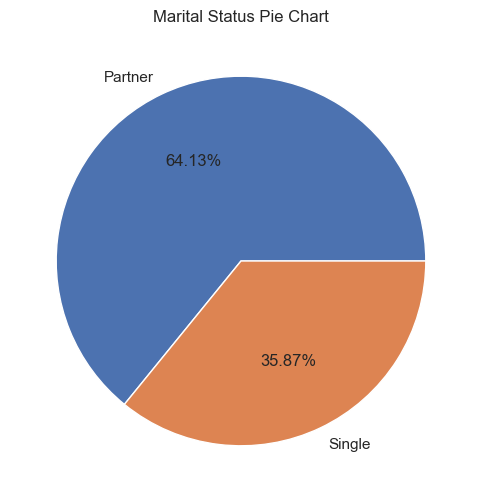

In [83]:
#Visualisasikan dalam Pie Chart
plt.figure(figsize=(8,6))
plt.pie(data['Marital_Status'].value_counts(), labels=['Partner', 'Single'], autopct= '%.2f%%')
plt.title("Marital Status Pie Chart")
plt.show()

In [84]:
#Menampilkan value unik dari kolom Education
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

**Insight**

Pada kolom **Education** terdapat 5 nilai yang terdiri dari:

1. **Basic**: Pendidikan dasar (SD, SMP, atau sejenisnya).
2. **Graduation**: Pendidikan sarjana (Bachelor's Degree).
3. **Master**: Pendidikan pascasarjana (Master's Degree).
4. **PhD**: Pendidikan doktoral (Doctorate Degree).
5. **2n Cycle**: Pendidikan tinggi di sistem Bologna (S1 + S2). 
   - Merujuk pada sistem Bologna, yang terdiri dari dua tahap pendidikan tinggi: **Bachelor (S1)** diikuti dengan **Master (S2)**.
   - Oleh karena itu, **2n Cycle** dapat dikelompokkan dengan level **Master** untuk tujuan analisis.

*Deskripsi di atas didasarkan pada observasi dan/atau asumsi pribadi.*


In [85]:
#Pada kolom Education, values 2n Cycle bisa dikelompokan hanya menjadi values Master
data['Education'].replace(to_replace=['2n Cycle'], value='Master', inplace=True)

##Pada kolom Education, values Graduation diubah menjadi Undergraduate agar lebih mudah dipahami
data['Education'].replace(to_replace=['Graduation'], value='Undergraduate', inplace=True)

#Menampilkan hasil
data['Education'].unique()

array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)

In [86]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [87]:
# Menampilkan jumlah nilai unik dari kolom 'Z_CostContact' dan 'Z_Revenue'
jumlah_nilai_unik = data[['Z_CostContact', 'Z_Revenue']].nunique()

# Menampilkan nilai unik dari kolom 'Z_CostContact'
unik_zcostcontact = data['Z_CostContact'].unique()

# Menampilkan nilai unik dari kolom 'Z_Revenue'
unik_zrevenue = data['Z_Revenue'].unique()

# Membuat DataFrame untuk jumlah nilai unik
jumlah_nilai_unik_df = pd.DataFrame({
    'Jumlah Nilai Unik': jumlah_nilai_unik
})

# Membuat DataFrame untuk nilai unik
unik_values_df = pd.DataFrame({
    'Values pada kolom Z_CostContact': [unik_zcostcontact],  # Menyimpan array dalam satu baris
    'Values pada kolom Z_Revenue': [unik_zrevenue]           # Menyimpan array dalam satu baris
})

# Menampilkan hasil
display(jumlah_nilai_unik_df, unik_values_df)


,Jumlah Nilai Unik
Z_CostContact,1
Z_Revenue,1


,Values pada kolom Z_CostContact,Values pada kolom Z_Revenue
0,[3],[11]


**Insight**

Berdasarkan analisis diatas, dapat disimpulkan bahwa kolom 'Z_CostContact' dan 'Z_Revenue' hanya memiliki 1 values yaitu 3 dan 11. Pada values tsb tidak dapat diinterpretasikan dengan baik sehingga tidak diperlukan dalam analisis

In [88]:
#Menghapus kolom 'Z_CostContact' dan 'Z_Revenue' dari DataFrame
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#Memeriksa hasil
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2052 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2052 non-null   int64         
 1   Year_Birth           2052 non-null   int64         
 2   Education            2052 non-null   object        
 3   Marital_Status       2052 non-null   object        
 4   Income               2028 non-null   float64       
 5   Kidhome              2052 non-null   int64         
 6   Teenhome             2052 non-null   int64         
 7   Dt_Customer          2052 non-null   datetime64[ns]
 8   Recency              2052 non-null   int64         
 9   MntWines             2052 non-null   int64         
 10  MntFruits            2052 non-null   int64         
 11  MntMeatProducts      2052 non-null   int64         
 12  MntFishProducts      2052 non-null   int64         
 13  MntSweetProducts     2052 non-null   i

---

##### 3. Handling Missing and Incomplete Values
- Terdapat Nan sebanyak 24 values pada kolom Income

In [90]:
# Menghitung jumlah missing values per kolom
missing_values = data.isnull().sum()

# Menghitung persentase missing values per kolom
missing_percentage = round((missing_values / len(data)) * 100, 2)

# Membuat dataframe untuk hasil
missing_summary = pd.DataFrame({
    'Column Name': missing_values.index,
    'Number of Missing Values': missing_values.values,
    'Percentage of Missing Values': missing_percentage.values
})

missing_summary


,Column Name,Number of Missing Values,Percentage of Missing Values
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,24,1.17
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntWines,0,0.00


In [91]:
# Menampilkan baris dengan NaN di kolom 'Income'
nan_data = data[data['Income'].isnull()]
nan_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Undergraduate,Together,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Undergraduate,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Undergraduate,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Undergraduate,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,Master,Together,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Together,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Undergraduate,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Together,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [92]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2052.000000,2052.000000,2028.000000,2052.000000,2052.000000,2052,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,5601.799708,1968.765595,52359.032051,0.445906,0.509259,2013-07-11 12:07:43.157894656,49.016569,304.140351,26.222710,167.826023,37.223197,27.215887,43.742203,2.336257,4.098441,2.659844,5.772417,5.320663,0.073099,0.076998,0.071637,0.065302,0.012671,0.009747,0.151072
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2813.250000,1959.000000,35502.500000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,23.000000,1.000000,16.000000,2.750000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5515.500000,1970.000000,51550.000000,0.000000,0.000000,2013-07-12 00:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8447.500000,1977.000000,68522.000000,1.000000,1.000000,2014-01-01 00:00:00,74.000000,505.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3254.369860,11.968027,25549.953808,0.537704,0.546619,NaN,28.992656,336.871357,39.750362,228.438377,54.467708,41.752430,51.941434,1.943370,2.799153,2.931908,3.242417,2.439018,0.260363,0.266653,0.257949,0.247118,0.111875,0.098266,0.358206


<Axes: xlabel='Income', ylabel='Count'>

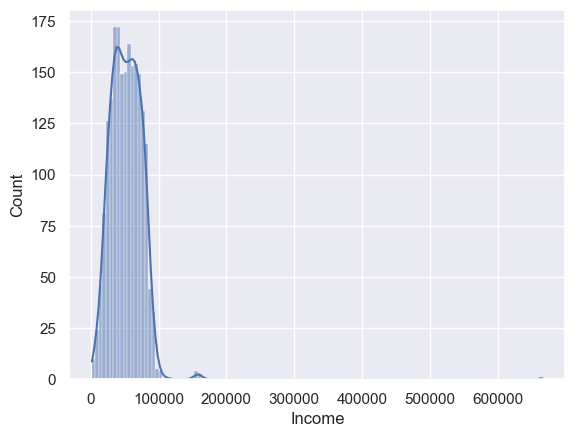

In [93]:
#Untuk melihat apakah kolom Income terdistribusi normal atau tidak, mari gunakan histogram
sns.histplot(data['Income'], kde= True)

In [94]:
from scipy.stats import skew

skewness = skew(data['Income'].dropna())
print("Skewness:", skewness)

Skewness: 7.054335220011804


**Analisis dan Keputusan**

Berdasarkan analisis diatas, berikut merupakan insight yang dapat disampaikan:
1. Missing Values pada Kolom Income: Terdapat 1,17% atau sebanyak 24 nilai yang hilang pada kolom Income.

2. Distribusi Data pada Kolom Income: Berdasarkan grafik, distribusi data pada kolom Income menunjukkan pola distribusi yang tidak normal, dengan ciri-ciri sebagai berikut:
- Tidak Simetris: Sebagian besar data terkonsentrasi di sisi kiri grafik (nilai Income rendah), dengan ekor yang lebih panjang ke arah kanan (nilai Income tinggi).
- Ekor Panjang ke Kanan: Terdapat nilai ekstrim (outliers) di sisi kanan, yang mengarah pada distribusi yang skewed to the right.
- Mean > Median: Dalam distribusi skewed to the right, nilai mean cenderung lebih besar daripada median, karena pengaruh nilai tinggi di ekor kanan.
3. Uji Skewness: Berdasarkan uji koefisien skewness, hasil yang diperoleh adalah 6,75 (lebih besar dari 0), yang menunjukkan distribusi data cenderung skewed to the right.

**Tindakan Imputasi**: Mengingat pentingnya kolom Income dalam analisis ini dan karakteristik distribusi yang tidak normal, imputasi dilakukan dengan menggunakan nilai median untuk menggantikan nilai yang hilang.

In [95]:
#Imputasi Nan dengan nilai median pada Kolom Income
data['Income'] = data['Income'].fillna(data.groupby(['Education', 'Kidhome', 'Teenhome'])['Income'].transform('median'))

In [96]:
#Menampilkan 10 baris acak dari DataFrame setelah imputasi
data.sample(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2019,2375,1972,Undergraduate,Together,30261.0,1,2,2012-09-25,75,8,0,5,0,3,6,1,0,0,3,8,0,0,0,0,0,0,0
748,2281,1970,Undergraduate,Single,33697.0,1,0,2013-09-15,34,4,3,7,0,3,11,1,1,0,2,7,1,0,0,0,0,0,0
987,4580,1969,Undergraduate,Together,75759.0,0,0,2013-10-25,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,0,1
343,6245,1950,PhD,Together,59292.0,0,1,2013-06-13,71,378,14,68,19,14,14,2,3,5,8,3,0,0,0,0,0,0,0
1811,269,1963,PhD,Single,46757.0,0,1,2012-11-16,71,777,30,163,0,51,122,6,4,4,7,9,0,0,0,0,0,0,0


In [97]:
#Memeriksa setelah dilakukan imputasi pada nilai null, sudah tidak ada data yg Nan atau missing values
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

---

##### 4. Anomalies and outliers

In [98]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

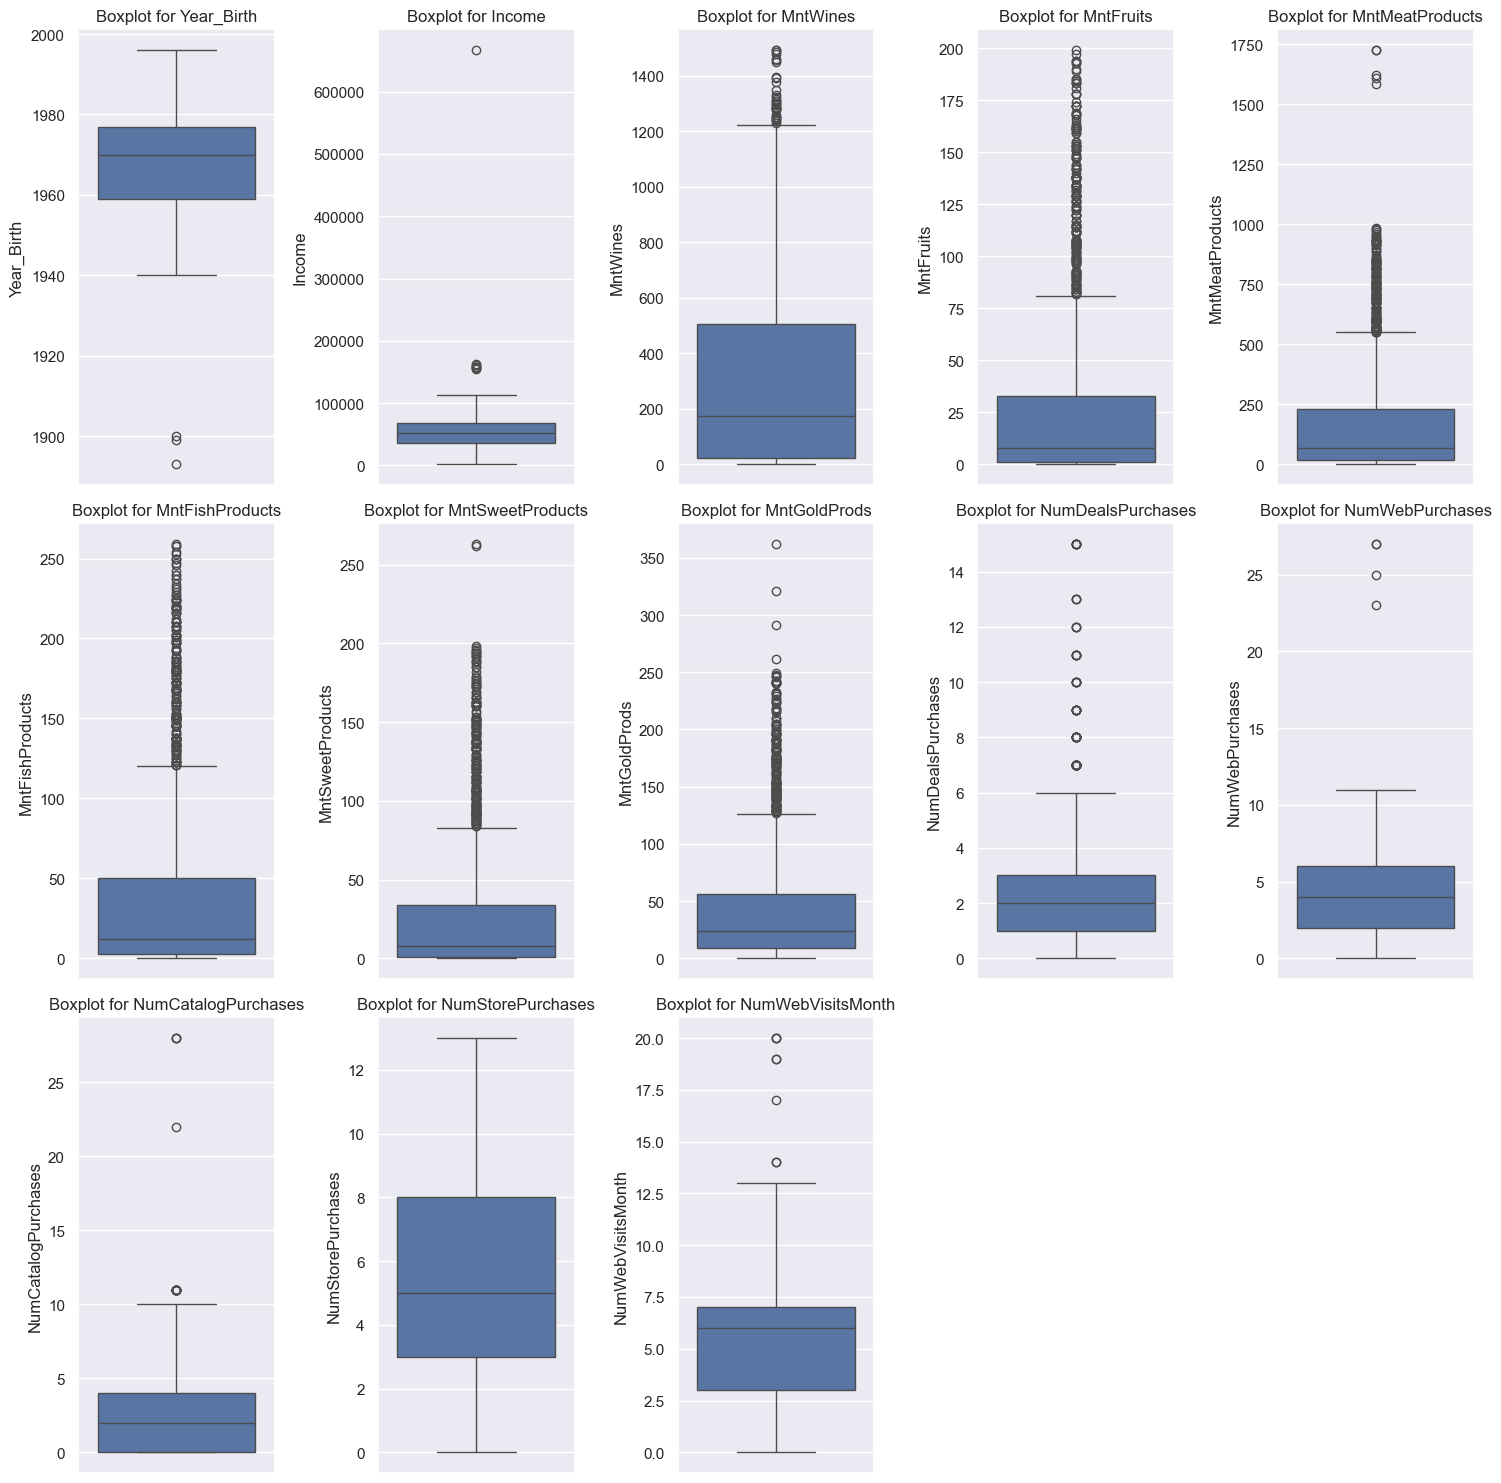

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom yang ingin ditampilkan dalam boxplot, kecuali 'ID'
kolom_numerik = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Menentukan jumlah kolom dan baris untuk subplot
jumlah_kolom = 5  # Maksimal 5 kolom dalam satu baris
jumlah_baris = (len(kolom_numerik) // jumlah_kolom) + (len(kolom_numerik) % jumlah_kolom != 0)

# Membuat figure dan subplots
plt.figure(figsize=(15, jumlah_baris * 5))

# Loop untuk menampilkan boxplot setiap kolom
for i, col in enumerate(kolom_numerik):
    plt.subplot(jumlah_baris, jumlah_kolom, i + 1)  # Menyusun boxplot dalam grid
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot for {col}')

# Menampilkan plot
plt.tight_layout()
plt.show()


Analisis Boxplot

1. Year_Birth
- Sebagian besar data menunjukkan kelahiran sekitar tahun **1960-1980**.
- Ada beberapa **outlier** untuk kelahiran sebelum tahun **1920**.

2. Income
- Median pendapatan berada di bawah **50.000**.
- Ada **outlier** yang menunjukkan pendapatan sangat tinggi, lebih dari **100.000**.

3. MntWines
- Pengeluaran untuk anggur memiliki distribusi yang cenderung condong ke bawah.
- Beberapa individu menghabiskan lebih dari **1.000**.

4. MntFruits
- Pengeluaran untuk buah sebagian besar berada di bawah **50**.
- Ada beberapa **outlier** dengan pengeluaran tinggi.

5. MntMeatProducts
- Pengeluaran untuk produk daging lebih bervariasi dibandingkan variabel lain.
- Median pengeluaran sekitar **200**, tetapi ada **outlier** melebihi **1.500**.

6. MntFishProducts, MntSweetProducts, dan MntGoldProds
- Pengeluaran untuk kategori ini sebagian besar berada di bawah **50**.
- Ada beberapa **outlier** dengan pengeluaran signifikan.

7. NumDealsPurchases
- Sebagian besar pelanggan melakukan **2-4 pembelian** berdasarkan promosi.
- Beberapa pelanggan melakukan lebih dari **10 pembelian** (outlier).

8. NumWebPurchases
- Sebagian besar pembelian melalui web berada di kisaran **2-6**.
- Terdapat beberapa **outlier** dengan lebih dari **10 pembelian**.

9. NumCatalogPurchases
- Median pembelian melalui katalog rendah (sekitar **1-2**).
- Beberapa pelanggan melakukan lebih dari **10 pembelian**.

10. NumStorePurchases
- Pembelian di toko sebagian besar berada di kisaran **5-10**.
- Ada beberapa **outlier** dengan lebih dari **13 pembelian**.

11. NumWebVisitsMonth
- Sebagian besar pelanggan mengunjungi situs web **2-5 kali** per bulan.
- Beberapa pelanggan mengunjungi lebih dari **15 kali** (outlier).


Handling outliers pada kolom Income

In [100]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'Income'
df = handle_outliers_with_max(data, 'Income')


Handling outliers pada kolom Year Birth

In [101]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dan minimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    min_valid_value = valid_data[column].min()
    
    # Mengganti outlier di atas upper_bound dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > upper_bound, max_valid_value, df[column])
    
    # Mengganti outlier di bawah lower_bound dengan nilai minimum yang valid
    df[column] = np.where(df[column] < lower_bound, min_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'Year_Birth'
df = handle_outliers_with_max(data, 'Year_Birth')


In [102]:
import numpy as np

def calculate_iqr_bounds(df, column):

    Q1 = np.quantile(df[column], 0.25)  # Kuartil pertama
    Q3 = np.quantile(df[column], 0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Interquartile range

    # Menghitung batas atas dan bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"IQR dari kolom {column} adalah {IQR}")
    print(f"Pada kolom {column}, Lower bound adalah {lower_bound} dan upper bound adalah {upper_bound}")

    return {"IQR": IQR, "lower_bound": lower_bound, "upper_bound": upper_bound}

# Menghitung IQR dan bounds untuk kolom 'Year_Birth'
result = calculate_iqr_bounds(data, 'Year_Birth')

IQR dari kolom Year_Birth adalah 18.0
Pada kolom Year_Birth, Lower bound adalah 1932.0 dan upper bound adalah 2004.0


In [103]:
data[data['Year_Birth'] < 1932]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Handling outliers pada kolom MntWines

In [104]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntWines'
df = handle_outliers_with_max(data, 'MntWines')


Handling outliers pada kolom 'MntFruits'

In [105]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntFruits'
df = handle_outliers_with_max(data, 'MntFruits')


Handling outliers pada kolom 'MntMeatProducts'

In [106]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntMeatProducts'
df = handle_outliers_with_max(data, 'MntMeatProducts')


Handling outliers pada kolom 'MntFishProducts'

In [107]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntFishProducts'
df = handle_outliers_with_max(data, 'MntFishProducts')

Handling outliers pada kolom 'MntSweetProducts'

In [108]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntSweetProducts'
df = handle_outliers_with_max(data, 'MntSweetProducts')

Handling outliers pada kolom 'MntGoldProds'

In [109]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'MntGoldProds'
df = handle_outliers_with_max(data, 'MntGoldProds')

Handling outliers pada kolom 'NumDealsPurchases'

In [110]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'NumDealsPurchases'
df = handle_outliers_with_max(data, 'NumDealsPurchases')

Handling outliers pada kolom 'NumWebPurchases'

In [111]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'NumWebPurchases'
df = handle_outliers_with_max(data, 'NumWebPurchases')

Handling outliers pada kolom 'NumCatalogPurchases'

In [112]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'NumCatalogPurchases'
df = handle_outliers_with_max(data, 'NumCatalogPurchases')

Handling outliers pada kolom 'NumWebVisitsMonth'

In [113]:
#Lakukan pengecekan outlier pada kolom yg memiliki outliers
def handle_outliers_with_max(df, column):
    # Menghitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menyaring data yang bukan outlier
    valid_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Nilai maksimum dari data yang valid (bukan outlier)
    max_valid_value = valid_data[column].max()
    
    # Mengganti outlier dengan nilai maksimum yang valid
    df[column] = np.where(df[column] > max_valid_value, max_valid_value, df[column])

    return df

# Menggunakan fungsi untuk kolom 'NumWebVisitsMonth'
df = handle_outliers_with_max(data, 'NumWebVisitsMonth')

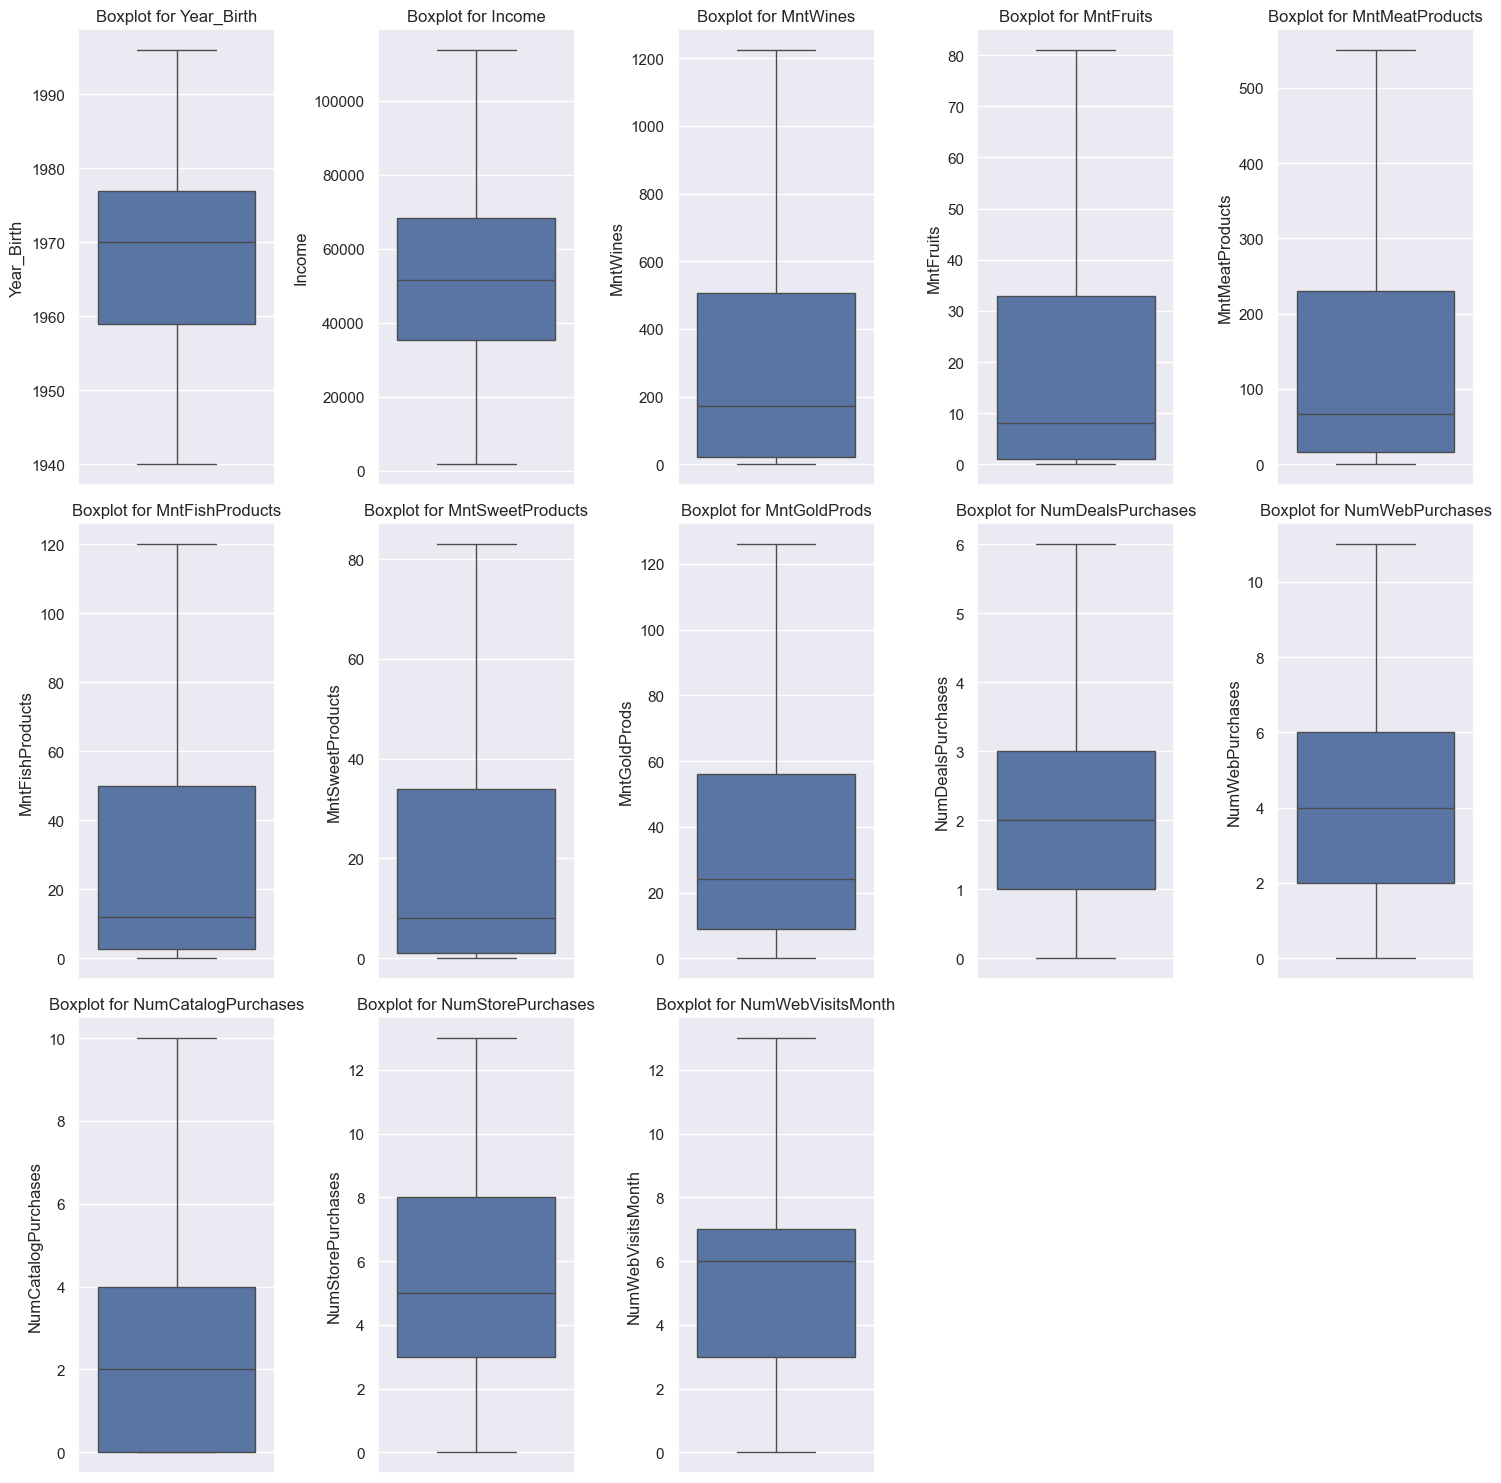

In [114]:
#Setelah dilakukan handling outliers, mari lihat kembali dalam boxplot

# Daftar kolom yang ingin ditampilkan dalam boxplot, kecuali 'ID'
kolom_numerik = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Menentukan jumlah kolom dan baris untuk subplot
jumlah_kolom = 5  # Maksimal 5 kolom dalam satu baris
jumlah_baris = (len(kolom_numerik) // jumlah_kolom) + (len(kolom_numerik) % jumlah_kolom != 0)

# Membuat figure dan subplots
plt.figure(figsize=(15, jumlah_baris * 5))

# Loop untuk menampilkan boxplot setiap kolom
for i, col in enumerate(kolom_numerik):
    plt.subplot(jumlah_baris, jumlah_kolom, i + 1)  # Menyusun boxplot dalam grid
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot for {col}')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [115]:
#Data yang disudah disesuaikan kemudian disimpan dalam format csv
data.to_csv('Supermarket Customers Cleaned.csv', index=False)

Setelah proses cleaning selesai, dataset yang telah disesuaikan dapat digunakan untuk tahap selanjutnya, yaitu **Exploratory Data Analysis (EDA)**, **Conclusion**, serta **Recommendation** (Dapat diakses pada file *Analysis*).